In [1]:
from sklearn import datasets
digits = datasets.load_digits()

In [2]:
import numpy as np
data_dimension = np.shape(digits.data)
print(f"Dimension des données : {data_dimension}")

Dimension des données : (1797, 64)


In [3]:
print("Description du jeu de données Digits:")
print(digits.DESCR)

Description du jeu de données Digits:
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are count

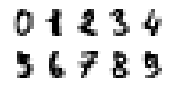

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 5, figsize=(2, 1))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.images[i], cmap='gray_r')
    ax.axis('off')
plt.show()

In [16]:
from scipy.cluster.hierarchy import linkage
matrice_liens = linkage(digits.data, method='ward')

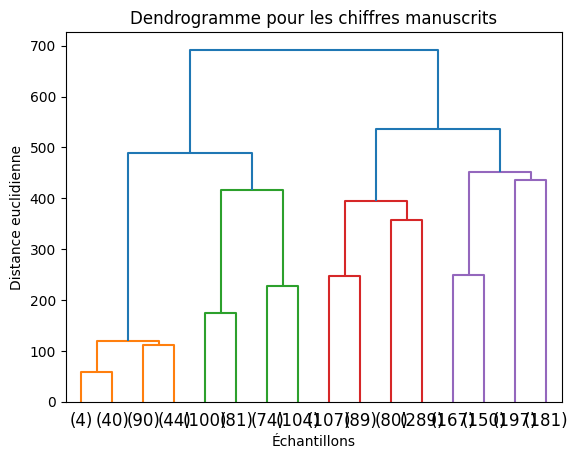

In [9]:
from scipy.cluster.hierarchy import dendrogram
dendrogram(matrice_liens, truncate_mode='level', p=3)
plt.title('Dendrogramme pour les chiffres manuscrits')
plt.xlabel('Échantillons')
plt.ylabel('Distance euclidienne')
plt.show()

In [14]:
from scipy.cluster.hierarchy import fcluster
# Utilisez une valeur de seuil basée sur le dendrogramme pour déterminer le nombre de clusters.
nombre_clusters_optimal = 10
clusters = fcluster(matrice_liens, nombre_clusters_optimal, criterion='maxclust')
# Afficher le nombre unique de clusters obtenus
nombre_clusters_obtenus = len(set(clusters))
print(f"Nombre de clusters obtenus : {nombre_clusters_obtenus}")
print(set(clusters))
clusters = clusters - 1
print(set(clusters))

Nombre de clusters obtenus : 10
{np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10)}
{np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9)}


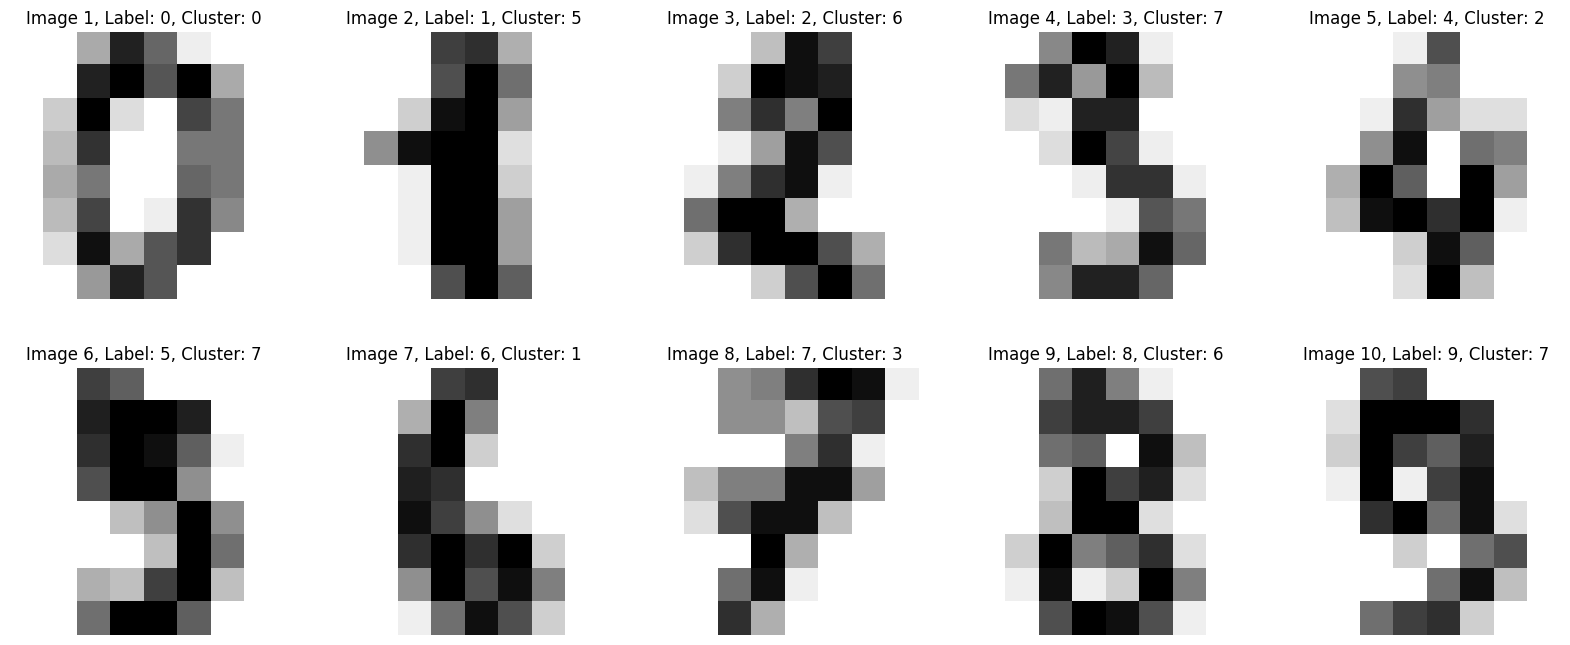

In [17]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.images[i], cmap='gray_r')
    ax.set_title(f"Image {i+1}, Label: {digits.target[i]}, Cluster: {clusters[i]}")
    ax.axis('off')
plt.show()

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_clusters = kmeans.fit_predict(digits.data)

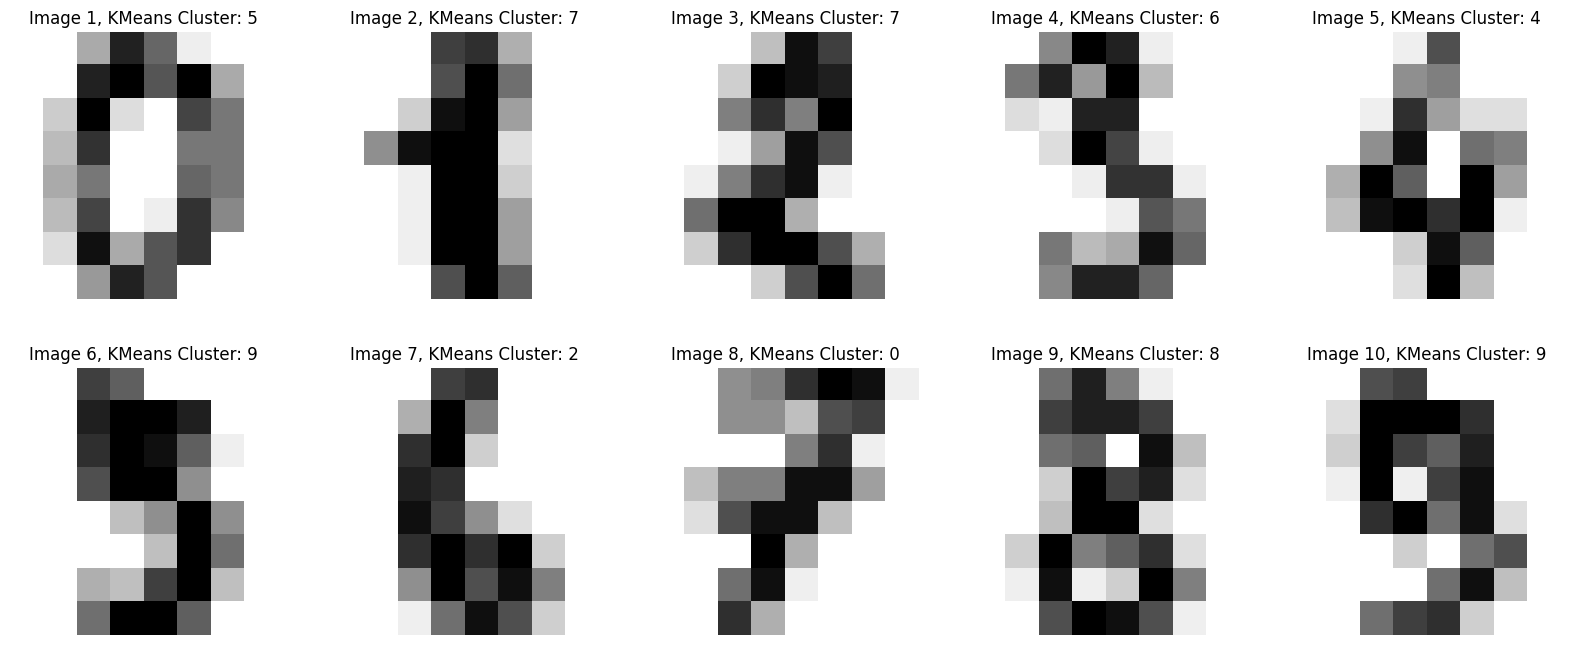

In [20]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.images[i], cmap='gray_r')
    ax.set_title(f"Image {i+1}, KMeans Cluster: {kmeans_clusters[i]}")
    ax.axis('off')
plt.show()

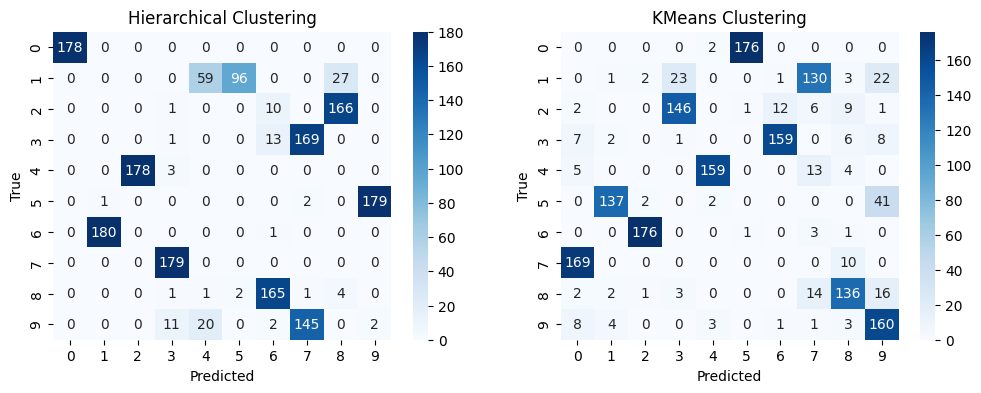

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix_hierarchy = confusion_matrix(digits.target, clusters)
conf_matrix_kmeans = confusion_matrix(digits.target, kmeans_clusters)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(conf_matrix_hierarchy, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Hierarchical Clustering")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")
sns.heatmap(conf_matrix_kmeans, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("KMeans Clustering")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")
plt.show()